# Airline Passenger Satisfaction
<img src="https://drive.google.com/uc?id=1HvDJElliYQKbdyiCQXsoKdjC8KefRoSL" alt="aitplane in the skies" style="width:500px;"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipydatagrid
import seaborn as sns
import bqplot as bqp

## I. Boarding (Introduction/background):

Tired of the constant flight delays? Confused about how to book your flight ticket online? Fed up with the mediocre Food and Drink service offered on-board? Perhaps, on the contrary, you are happy with the comfort of your seat, the spaciousness of the leg room, or the variety of in-flight entertainment provided by your airline. Which of these factor(s) matter to you the most, the consumer?
Look no further! We have the answers right here for you!



In our analysis of Airline Passenger Satisfaction, we look at various, different variables affecting customer satisfaction, namely Age, Flight Distance, Departure Delay, Arrival Delay, Departure and Arrival Time Convenience, Ease of Online Booking, Check-in Service, Online Boarding, Gate Location, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Service, In-flight Wifi Service, In-flight Entertainment, and Baggage Handling, with the ultimate goal of trying to determine and understand the factors that contribute most to customer satisfaction.
In our expedition through Exploratory Data Analysis (EDA), we examine, for example, the different data types and the idiosyncratic nature of our attributes. Utilizing assorted charts and graphs, we can visually analyze the distribution of our dataset and scrutinize closely the relationships among the different variables. By uncovering and interpreting patterns in our dataset during EDA, it will help us understand potential risks or trends the models will create in the Modeling phase. 
In the Modeling phase, we use a classification model, namely Logistic Regression, to finally make a prediction about the factors that matter most to customer satisfaction. We will consider different logistic regression techniques, compare their results, and use the most effective one for our model. 
Excited to embark on this data exploratory journey? So are we! Now sit back, relax, and enjoy the flight! Satisfaction guaranteed!

Before we “take off” on our data exploration flight, we import our airline_passenger_satisfaction.csv file, which can be located on Kaggle’s website: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction

In [2]:
airlines_df = pd.read_csv("airline_passenger_satisfaction.csv")

## II. Take-Off (Exploratory Data Analysis)

Now, as our flight glides on the runway and climbs into the sky of EDA, we take a quick look at the individual features, their Non-Null Count (to discover if there are any NULLs in the dataset), and their data type, which is useful later on when we need to manipulate our dataset.

In [3]:
# Quick overview of the columns and their types
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Of course, no data analysis is complete without checking the summary statistics of our dataset. It summarizes the central tendency, dispersion shape of a dataset’s distribution, excluding any NaN values. 

In [4]:
# Summary statistics
airlines_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Earlier, when we looked at the Non-Null Count of each feature, we noticed that the “Arrival Delay column had some NULL values. Let’s look at it using a heatmap!

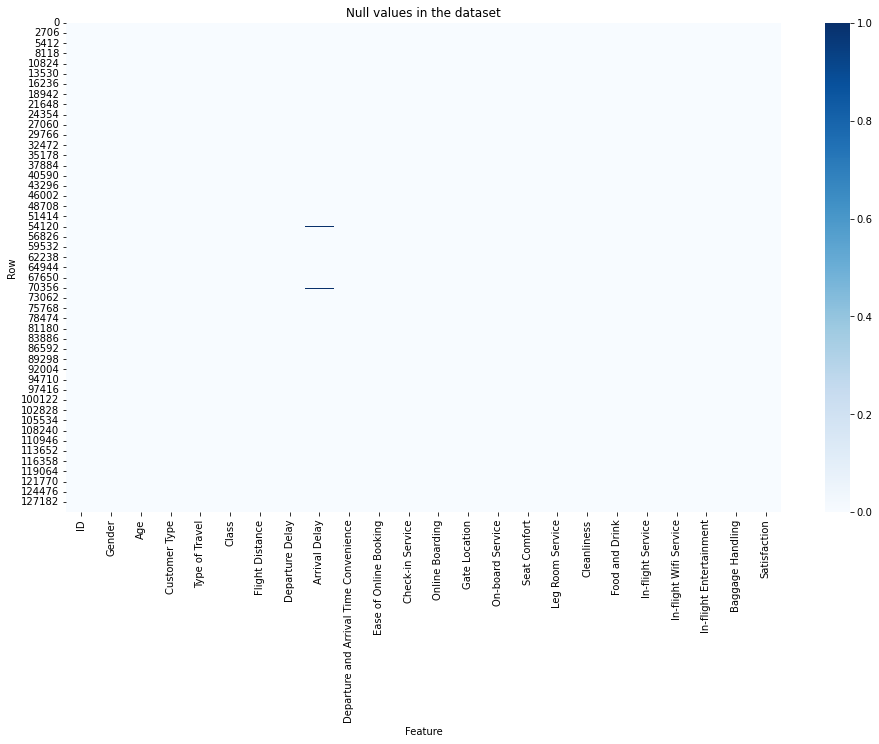

In [5]:
# Checking for NaN values
plt.figure(figsize=(16,9))
plt.title("Null values in the dataset")
ax = sns.heatmap(airlines_df.isna().astype(int), cmap='Blues');
ax.set_xlabel("Feature")
ax.set_ylabel("Row");

We sum up all the NULL value for each column and we noticed that there are 393 NULL values.

In [6]:
airlines_df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

We look at the “Arrival Delay” column in detail, focusing in on the instances where we have NaN values. Given that we have 393 NULL instances out of 129,880 instances, which is only 0.30%, we decided that the immateriality of the NULL instances warrant dropping those rows altogether so that we can solely focus on the rows with complete information. <span style="font-weight: bold;">Given we have only 393 rows with NaN for Arrival Delay, we can probably drop all NaN rows without much impact on the overall analysis</span>

In [7]:
# Examine data with null values
airlines_df[airlines_df['Arrival Delay'].isnull()]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


In [8]:
airlines_df.dropna(inplace=True)

Next, as we settle in on our flight, we look at the age distribution by gender. We can see that the distribution of the data between male and female is very similar in our dataset. Notice the rather interesting dip in frequency for travellers between ages ~25 to ~35.

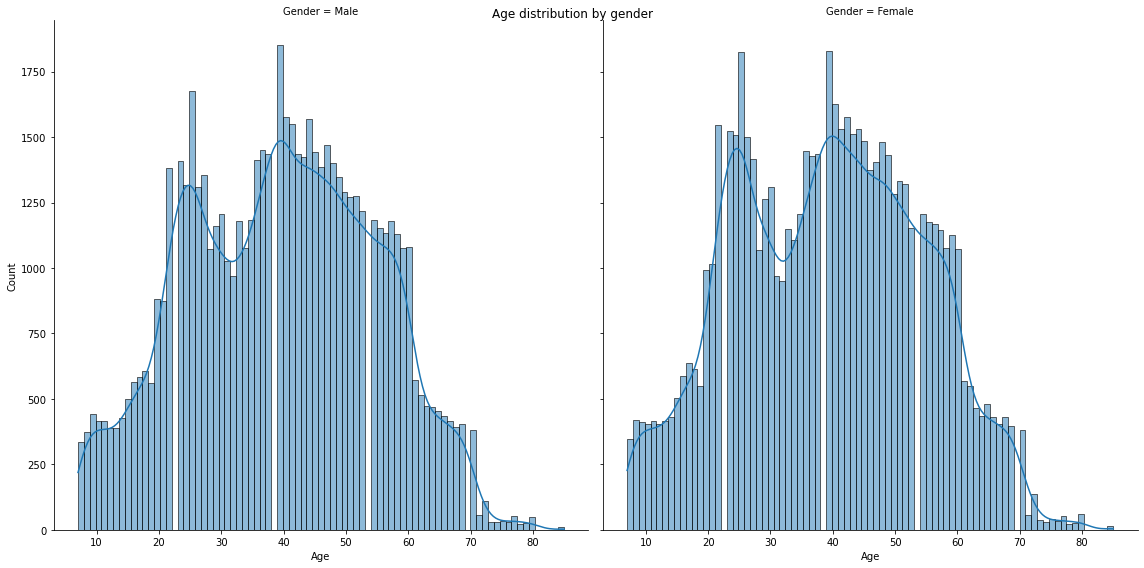

In [9]:
# Distribution of ages by gender
# plt.title("Age distribution by gender")
fig = sns.displot(airlines_df, x='Age', kind='hist', col='Gender', kde=True, height=8, aspect=1)
fig.fig.suptitle('Age distribution by gender');

To better visualize the similarity in the distribution between male and female, we binned the age by gender: <= 14, 15-24, 25-64, and >65

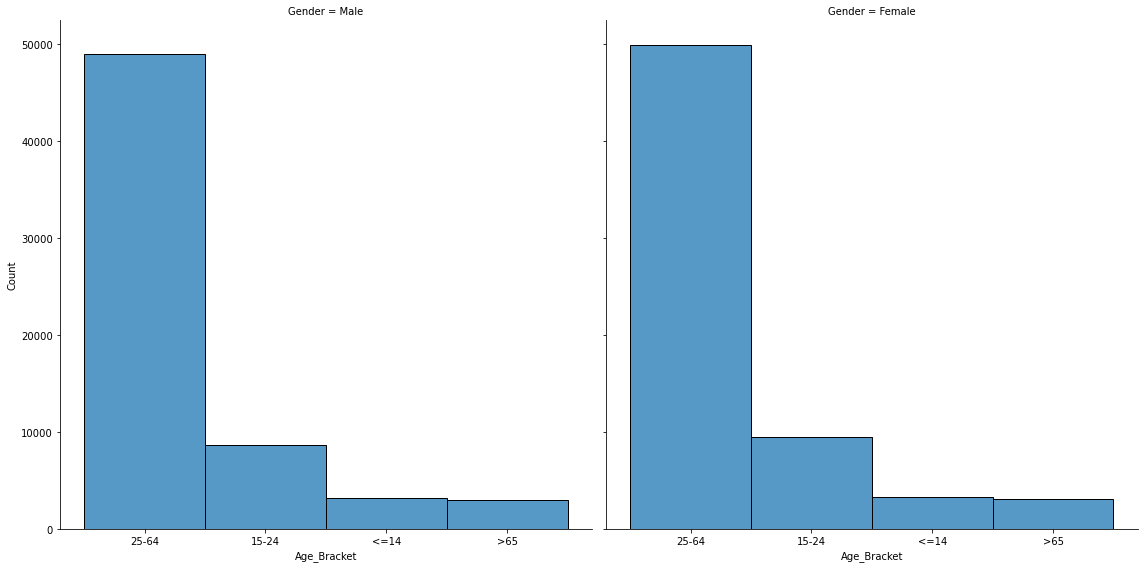

In [10]:
# Age by bracket
def get_age_bracket(age):
    if age <= 14:
        return "<=14"
    elif age >= 15 and age <= 24:
        return "15-24"
    elif age >=25 and age <= 64:
        return "25-64"
    else:
        return ">65"
airlines_df['Age_Bracket'] = airlines_df["Age"].apply(get_age_bracket)
sns.displot(airlines_df, x='Age_Bracket', kind='hist', col='Gender', kde=False, height=8, aspect=1);

Next, since we were just looking at the count of each gender by age (and by age bracket), we look at the spread for the Satisfaction feature by age. We noticed that there are a lot more younger people who are “Neutral or Dissatisfied” with airlines, while there are slightly more older people who are “Satisfied” with airlines, based on the scores of the various features that were evaluated. 
We definitely have a lot of work to do in the airline industry to satisfy and appeal to the younger folks!

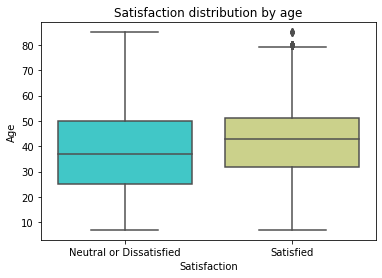

In [11]:
# Relationship between satisfaction and age
plt.title("Satisfaction distribution by age")
sns.boxplot(data=airlines_df, x="Satisfaction", y="Age", palette="rainbow");

We now plot Satisfaction by age bracket, using the same binning strategy as we used above. Using binning allows us to determine that there is actually a lot of work to do for the airline industry across all age brackets when it comes to customer satisfaction!

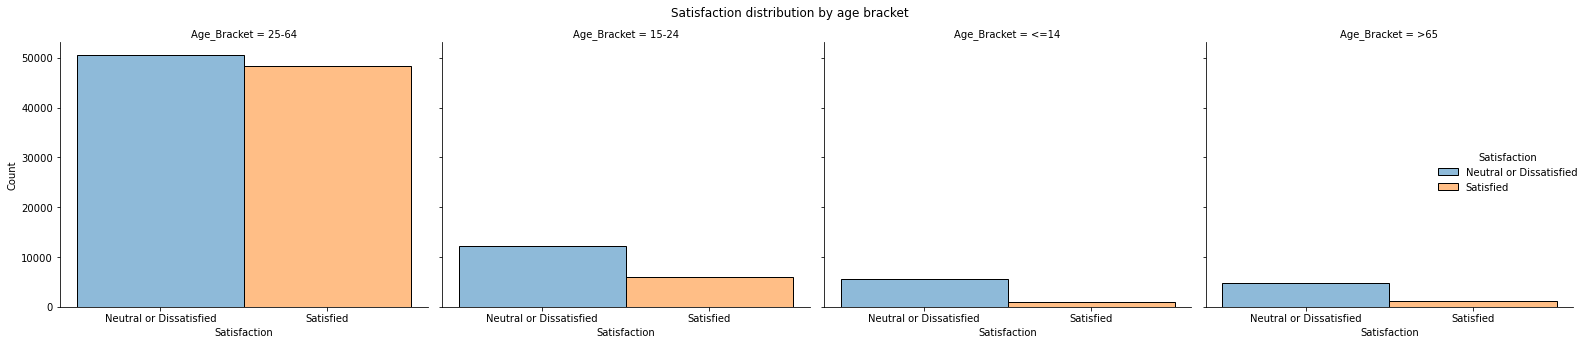

In [12]:
# Relationship between satisfaction and age bracket
# sns.countplot(data=airlines_df, x="Satisfaction")
fig = sns.displot(airlines_df, x='Satisfaction', kind='hist', col='Age_Bracket', kde=False, hue="Satisfaction");
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.fig.suptitle('Satisfaction distribution by age bracket');

This plot confirms our understanding: it shows that we have a bit more “Neutral or Dissatisfied” customers than “Satisfied” Customers. But this is still a relatively balanced sample.

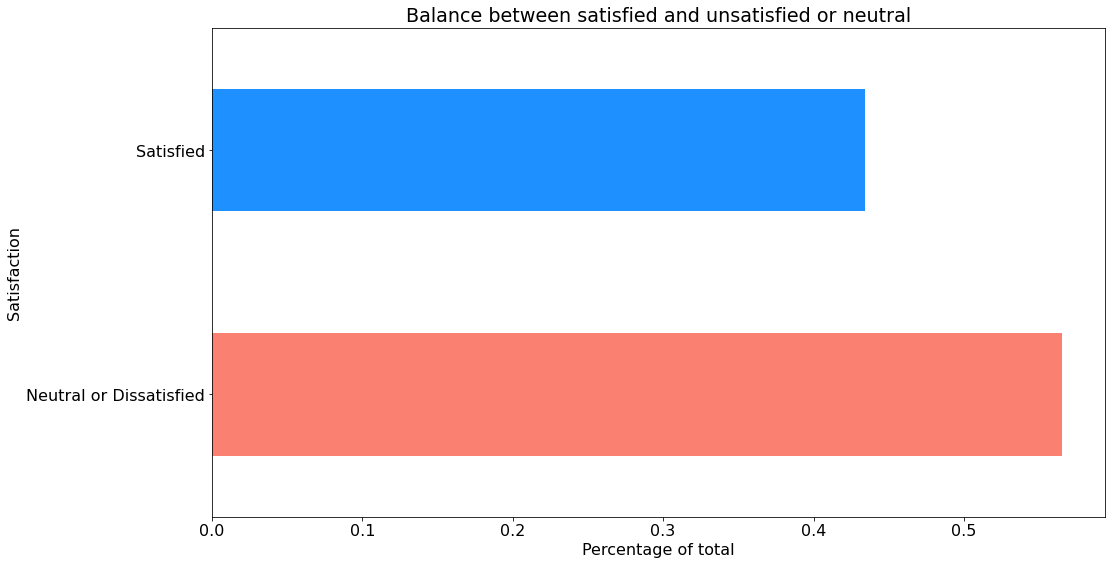

In [13]:
# Balance between satisfied and unsatisfied customers
plt.rcParams['font.size'] = '16'
fix, ax = plt.subplots(figsize=(16,9))
ax.axes = airlines_df['Satisfaction'].value_counts(normalize=True).plot(kind="barh", color=['salmon', 'dodgerblue'])
ax.set_xlabel("Percentage of total")
ax.set_ylabel("Satisfaction")
plt.title("Balance between satisfied and unsatisfied or neutral");

We next create a Feature Correlation Matrix, which allows us to evaluate the direction as well as the strength of a relationship between variables. Look at the huge correlation between Departure Delay vs Arrival Delay! Overall there is some multicollinearity, but is it too much so that it affects the quality of our modeling? We will find out soon enough!

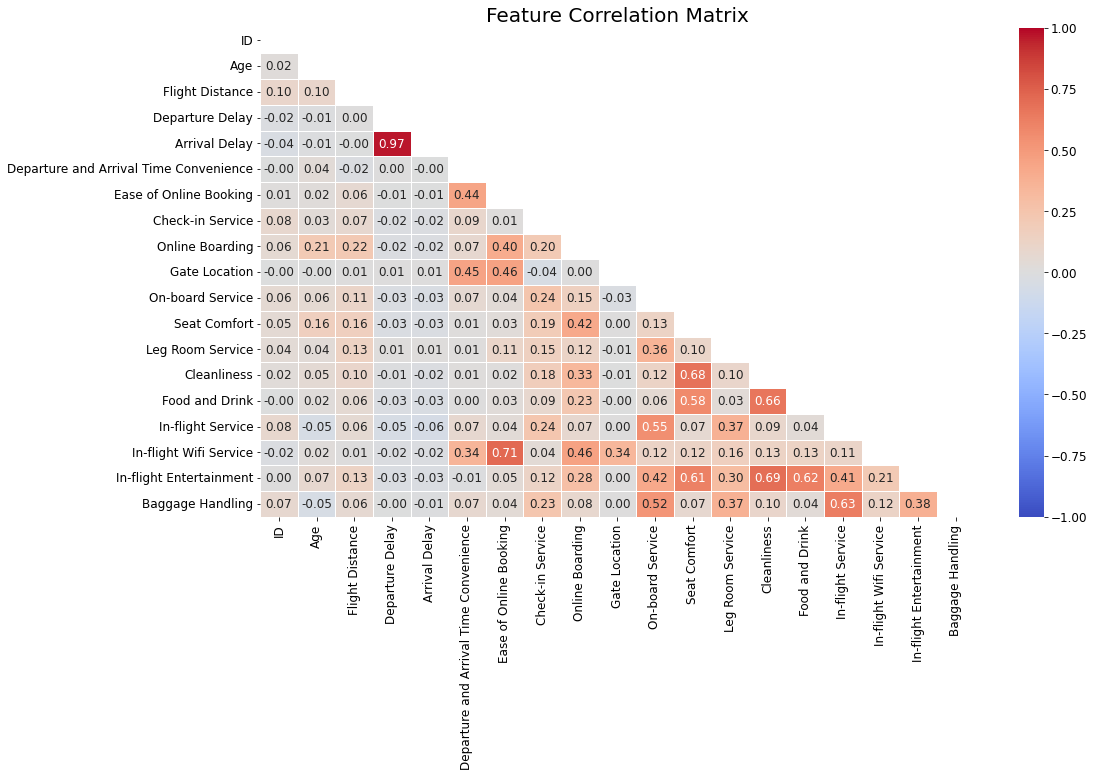

In [14]:
mask = np.zeros_like(airlines_df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(16,9))
plt.rcParams['font.size'] = '12'
plt.title("Feature Correlation Matrix", fontsize=20)
sns.heatmap(airlines_df.corr(), annot=True, mask=mask, linewidths=.5, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm');

Don’t get out of your seats just yet! The seatbelt sign is still on! We turn on the In-flight entertainment system to view our Interactive EDA

## Interactive EDA

The interactive data explorer is designed to give you, the consumer of this notebook, flexibility in ease of exploring the data set without having to write code. We can answer a lot of questions quickly, just by selecting the the parameters we want and letting the filtering and aggregation mechanisms do the explaning, visually, for us. The Interactive Data Explorer is comprised of three parts:
1. Control panel
2. Interactive datagrid
3. Interactive scatter chart

The control panel is comprised of a number of selectors:
* Range slider for filtering the main dataframe based on an age range
* Dropdown menu for selecting, and filtering the dataset based on gender
* Dropdown for selecting the x-axis of the scatter plot
* Dropdown for selecting the y-axis of the scatter plot

The datagrid is a fully interactive widget which supports filtering and sorting from the UI layer or programatically. The filtering/sorting menu is available on each column header - please do try it out!

The scatter chart is based on OpenGL and can render thusands of points. This is particularly appealing for datasets such as the one we have as it allows us to get a bird's eye view of our dataset and its features. The scatter chart supports panning and zooming. Great when you want to zoom in or out to get a more granular view! 

For the best user experience, we recommend that you right click anywhere in the Interactive Data Explorer region and select "Create new view for output". This will open up a new tab with the the Interactive Data Explorer view, and you will be able to keep it open and in fixed position without needing to scroll up and down to see the full application!

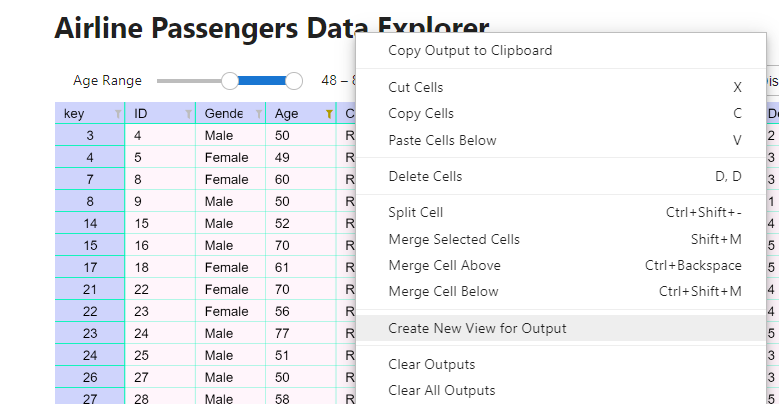
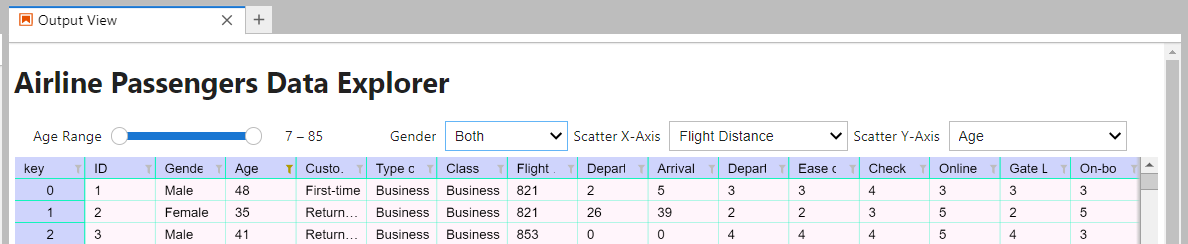

The datagrid and scatter chart should react to changes in the selections or values of the range slider and dropdown mnues. Changes may take up to a second to show.

In [15]:
# Setting up a datagrid
grid = ipydatagrid.DataGrid(airlines_df)

# Some theming to add some color
cotton_candy = {
    "background_color": "rgb(255, 245, 251)",
    "header_background_color": "rgb(207, 212, 252, 1)",
    "header_grid_line_color": "rgb(0, 247, 181, 0.9)",
    "vertical_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "horizontal_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "selection_fill_color": "rgb(212, 245, 255, 0.3)",
    "selection_border_color": "rgb(78, 174, 212)",
    "header_selection_fill_color": "rgb(212, 255, 239, 0.3)",
    "header_selection_border_color": "rgb(252, 3, 115)",
    "cursor_fill_color": "rgb(186, 32, 186, 0.2)",
    "cursor_border_color": "rgb(191, 191, 78)",
}

grid.grid_style = cotton_candy

In [16]:
# Define widgets and variables
numerical_cols = airlines_df.select_dtypes([int, float]).columns.tolist()
age_range = (airlines_df['Age'].min(), airlines_df['Age'].max())
columns_index = {k:grid._column_name_to_index(k) + 1 for k in airlines_df.columns}
range_slider = widgets.IntRangeSlider(min=age_range[0], max=age_range[1], value=age_range, description="Age Range")
gender_dropdown = widgets.Dropdown(options=airlines_df['Gender'].unique().tolist() + ["Both"], 
                                   value="Both", layout={"width":"200px"}, description="Gender")
scatter_x_dropdown = widgets.Dropdown(options=numerical_cols, 
                                      value=numerical_cols[2], layout={"width":"250px"}, description="Scatter X-Axis")
scatter_y_dropdown = widgets.Dropdown(options=numerical_cols, value=numerical_cols[1], 
                                      layout={"width":"250px"}, description="Scatter Y-Axis")

# Chart
sc_x = bqp.LinearScale()
sc_y = bqp.LinearScale()
scatt = bqp.ScatterGL(
    x=airlines_df[scatter_x_dropdown.value].values,
    y=airlines_df[scatter_y_dropdown.value].values,
    names=np.arange(10),
    scales={"x": sc_x, "y": sc_y},
    colors=["limegreen", "purple"],
)
ax_x = bqp.Axis(scale=sc_x, label=scatter_x_dropdown.value)
ax_y = bqp.Axis(scale=sc_y, orientation="vertical", tick_format="d", label=scatter_y_dropdown.value)
fig = bqp.Figure(marks=[scatt], axes=[ax_x, ax_y], padding_x=0.025, interaction=bqp.interacts.PanZoom(scales={'x': [sc_x], 'y': [sc_y]}),
                 title="Select axes from the dropdown boxes!")


# Callback functions
def filter_gender(e):
    with grid.hold_sync():
        selected_gender = e.get("new")
        if selected_gender == "Both":
            grid._transforms = list(filter(lambda x: x['columnIndex'] != columns_index.get("Gender"), grid._transforms))
            update_scatter_chart(None)
            return 

        grid.transform([
            {"type": "filter", "operator": "=", "columnIndex": columns_index.get("Gender"), "value": selected_gender},
            {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': range_slider.value}
        ])
        update_scatter_chart(None)
    
def filter_age(e):
    with grid.hold_sync():
        start_age, end_age = e.get("new")
        grid.transform([
            {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': (start_age, end_age + 1)}
        ])
        update_scatter_chart(None)
    
def update_scatter_chart(e):
    with scatt.hold_sync():
        data = grid.get_visible_data()
        scatt.x = data[scatter_x_dropdown.value].values
        scatt.y = data[scatter_y_dropdown.value].values
        sc_x.min = float(data[scatter_x_dropdown.value].min())
        sc_x.max = float(data[scatter_x_dropdown.value].max())
        sc_y.min = float(data[scatter_y_dropdown.value].min())
        sc_y.max = float(data[scatter_y_dropdown.value].max())
        ax_x.label = scatter_x_dropdown.value
        ax_y.label = scatter_y_dropdown.value
        fig.title = f"{scatter_x_dropdown.value} vs. {scatter_y_dropdown.value}"
    
# Event handlers    
gender_dropdown.observe(filter_gender, names=['value'])
range_slider.observe(filter_age, names=['value'])
scatter_x_dropdown.observe(update_scatter_chart, names=["value"])
scatter_y_dropdown.observe(update_scatter_chart, names=["value"])
grid.observe(update_scatter_chart, names=["_transforms"])


# Layout container for both grid and widgets
interactive_data_explorer = widgets.VBox([
    widgets.HTML(value="<h1>Airline Passengers Data Explorer</h1>"),
    widgets.HBox([
        range_slider, gender_dropdown, scatter_x_dropdown, scatter_y_dropdown
    ], layout=widgets.Layout(flex='1 1 auto', width='100%')),
    grid,
    fig
])

Now what you have your highly sophisticated entertainment system in place, let's do some explorations!

The default view starts no filter on the age range or gender, and the selected features are Flight Distance on the y-axis and Age on the x-axis.
- One interesting observation we can see right off the bat, is the rather interesting gap in data for ages 81-84 (inclusive). Our dataset does not seem to include that age range, which is probably a data collection issue more than anything systemic. 
- On the x-axis, if we pan to the right, we can see that we also have significantly less data points for long-haul flight over 4000 miles.
- Another interesting observation is how, for ages ~73 and above, the desnsity flights desclines as the flight distance increases. It appears seniors do not enjoy long haul flights, which is expected. 

Next, we want to look at the Flight Delay distribution for young people aged 18-22 who fly economy. 
- We start by narrowing down the age range to 18-22 via the range slider. 
- We then want to filter for flights in Economy and Economy Plus, but we don't have a dropdown for that feature! Thankfully it's not a problem as we can filter directly from the grid's UI by clicking on the filter icon on the "Class" column header and "filter by value", and ticking the relevant boxes.
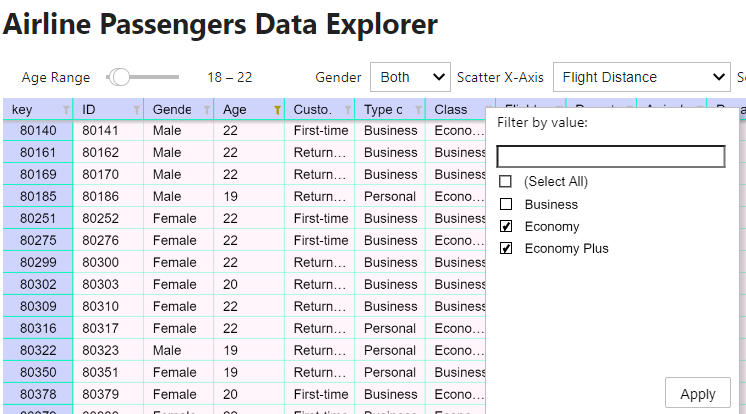
- Finally, we select Flight Distance for the x-axis, and Departure Delay for the y-axis of the scatter chart

We can see that the shorter flights flown by people ages 18-22 in Economy clas have more, often longer delays with the higher delay being close to 550 minutes for a 250 mile flight. The overall trend is that departure delay declines with the flight distance for that group. The distribution looks somewhat logarithmic, with the peaknedness being between the 0-600 miles range, and a long tail tapering off as the flight distance increases.

In [17]:
interactive_data_explorer

## III. In-Flight (Modeling)

In [18]:
from sklearn.model_selection import train_test_split

<span style="font-weight: bold;">Before we start train/test splitting, we need to reason about the kind of analysis we want to do, and whether the data, in its current form, is suitable.
The obvious target for this dataset, given we're dealing with passenger satisfaction with a given airline, would be to to predict whether a potential
passenger would be satisfied or neutral/unsatisfied given some paramaters like their age, sex, travel class, flight delay etc.</span>

<span style="font-weight: bold;">This type of analysis lends itself nicely to Logistic Regression, which could be the ideal model to use for this analysis, with this dataset.
To use logistic regression, we are likely going to need to One-Hot Encode categorical series so they're represented as numbers.</span>

In [19]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

<span style="font-weight: bold;">It's possible to see that we have quite a few columns which contain categorical data, with the most crucial column being the predicted column.</span>

In [20]:
# Columns with categorical data
airlines_df.select_dtypes(["object"]).head(3)

,Gender,Customer Type,Type of Travel,Class,Satisfaction,Age_Bracket
0,Male,First-time,Business,Business,Neutral or Dissatisfied,25-64
1,Female,Returning,Business,Business,Satisfied,25-64
2,Male,Returning,Business,Business,Satisfied,25-64


<span style="font-weight: bold;">Below, we create a new dataframe which has all categorical values encoded to integers. We will use that dataframe to train and test our models.</span>

In [21]:
from sklearn.preprocessing import LabelEncoder

# Function to retrieve the string to integer mapping used in One-Hot encoding
def get_encoding_mapping(encoded_series, types):
    return dict(zip(encoded_series.classes_, encoded_series.transform(types)))

# Creating a copy of the airlines dataframe, as we will encode and replace 
# categorical columns with their numerical equivalents
airlines_df_encoded = airlines_df.copy()

# Mapping dictionary to convert back from encoding to string - will be used later!
enc_mappings = []

for col in airlines_df_encoded.select_dtypes(["object"]).columns:
    # One-Hot encoding categorical columns
    cur_series = airlines_df_encoded[col]
    col_enc = LabelEncoder()
    col_enc.fit(cur_series)
    col_unique_vals = cur_series.unique().tolist()
    enc_mappings.append(get_encoding_mapping(col_enc, col_unique_vals))
    airlines_df_encoded[col] = col_enc.transform(cur_series)

In [22]:
# Checking the conversion succeeded
airlines_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  int64  
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  int64  
 4   Type of Travel                          129487 non-null  int64  
 5   Class                                   129487 non-null  int64  
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  1294

In [23]:
# The 'ID' columns is unlikely to be useful for our model, so we will drop it.
airlines_df_encoded = airlines_df_encoded.drop('ID', axis=1)

<span style="font-weight: bold;">Our data is now in the right shape to be used as an input to a ML model! Recall that some columns had very high positive/negative correlation. We should keep an eye on those and potentially drop some of them as inputs so that we reduce the amount of multicollinearity in the model.</span>

In [24]:
# Columns used to predict "Satisfaction"
feature_list = list(filter(lambda x: x != 'Satisfaction', airlines_df_encoded.columns.tolist()))

In [25]:
# Define regressor and regressand
y = airlines_df_encoded[['Satisfaction']]
X = airlines_df_encoded[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Sanity check everything looks okay
display(X_train.head(3))

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Age_Bracket
56176,0,21,1,1,1,1400,5,0.0,4,4,...,3,2,4,2,2,5,4,2,3,0
89346,0,60,0,0,1,1587,0,11.0,1,1,...,3,2,3,2,2,3,1,2,3,1
31640,1,50,1,0,1,846,0,0.0,4,4,...,2,4,3,4,4,4,4,4,5,1


<span style="font-weight: bold;">We're ready to instantiate and fit our model now! But before we do that, it would be good to define a helper function which can standardise the way we fit, train and score our models. This will reduce code duplication and the potential for operational.</span>

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, roc_auc_score, classification_report

def run_model(model, X_train, X_test, y_train, y_test, print_results=True):
    # Convert to 1D arrays as some of the sklearn functions require them    
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    # Fit our and train our model     
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    if print_results:
        print(f"Accuracy:{accuracy}, ROC AUC: {roc_auc}")
        print(classification_report(y_test,y_pred,digits=5))
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
        cmd = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax1)
        rocd = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax2)
    
    return model, accuracy, roc_auc

<span style="font-weight: bold;">We can also add a function for inspecting the regression coefficients for LogisticRegression, so we can get more insight about the relevance of our features. This function is defined below.</span>

In [28]:
import statsmodels.api as sm

def infer_logistic_regression_coefs(y_train, X_train):
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()
    print(result.summary())

#### Logistic Regression

Accuracy:0.8740960894900658, ROC AUC: 0.8697531830129747
              precision    recall  f1-score   support

           0    0.87757   0.90316   0.89018     24143
           1    0.86927   0.83635   0.85249     18588

    accuracy                        0.87410     42731
   macro avg    0.87342   0.86975   0.87134     42731
weighted avg    0.87396   0.87410   0.87379     42731



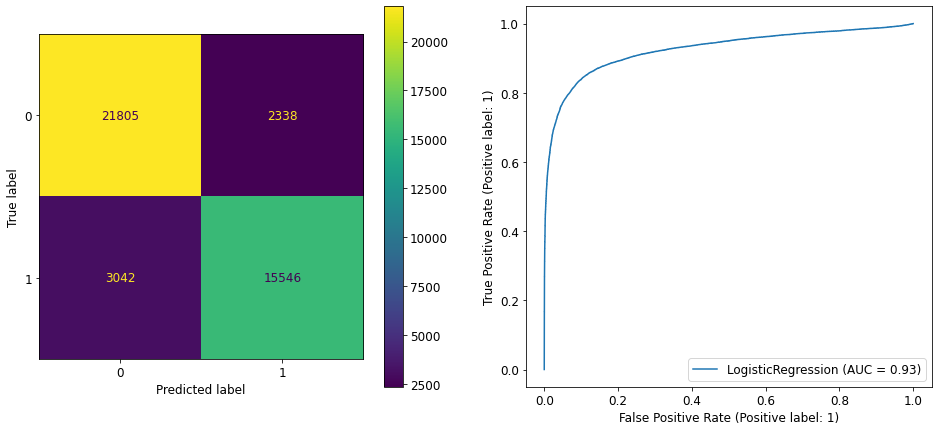

In [29]:
from sklearn.linear_model import LogisticRegression

# Running our model (using a higher number of iteration to maximize chance of model convergence)
lg_model, lg_accuracy, lg_roc_auc = run_model(LogisticRegression(max_iter=4000), X_train, X_test, y_train, y_test);

<span style="font-weight: bold;">Some additional statistics. Looking into the regression model and determining which features are important and affect our regression.</span>

In [30]:
infer_logistic_regression_coefs(y_train, X_train)

Optimization terminated successfully.
         Current function value: 0.394624
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                86756
Model:                          Logit   Df Residuals:                    86733
Method:                           MLE   Df Model:                           22
Date:                Fri, 19 Aug 2022   Pseudo R-squ.:                  0.4235
Time:                        23:16:15   Log-Likelihood:                -34236.
converged:                       True   LL-Null:                       -59382.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender                                    -0.2032   

<span style="font-weight: bold;">Let's add regularization. We will start with L1 ratio of 1, which means we're looking at full Lasso regression. In scikit-learn, ElsticNet regularized logistic regression must be performed using the "saga" solver.</span>

/home/idafna/micromamba/envs/cis545/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy:0.712854836067492, ROC AUC: 0.7049355511407039
              precision    recall  f1-score   support

           0    0.73645   0.76585   0.75086     24143
           1    0.67924   0.64402   0.66116     18588

    accuracy                        0.71285     42731
   macro avg    0.70785   0.70494   0.70601     42731
weighted avg    0.71156   0.71285   0.71184     42731



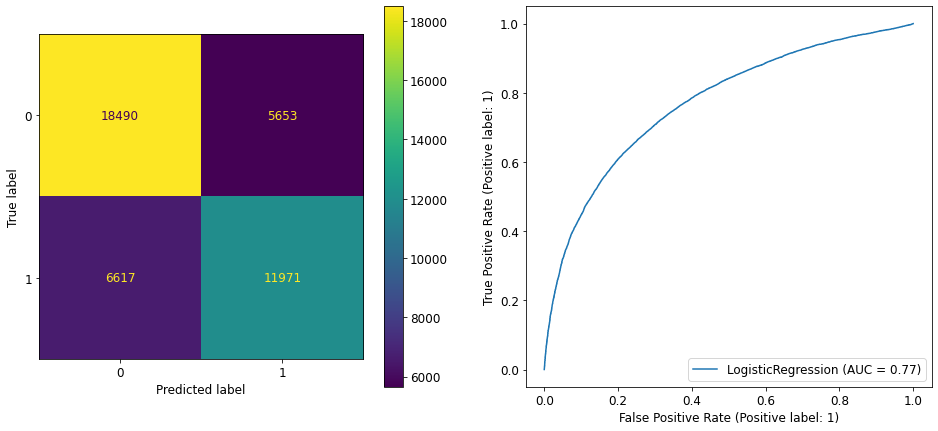

In [31]:
model, accuracy, roc_auc = run_model(LogisticRegression(penalty="elasticnet", l1_ratio=0.5, solver="saga"), X_train, X_test, y_train, y_test);

<span style="font-weight: bold;">We were able to use the 'saga' solver in order to add a regularization term, but we can see the <span style='color:red'>warning</span> indicating the solver wasn't able to converge. This is because logistic regression models with regularization are not scale invariant! We can improve the proformance of the 'saga' solver by standardizing the input. Let's do that below!</span>

Accuracy:0.8741896983454635, ROC AUC: 0.869761753102954
              precision    recall  f1-score   support

           0    0.87723   0.90382   0.89033     24143
           1    0.86996   0.83570   0.85249     18588

    accuracy                        0.87419     42731
   macro avg    0.87359   0.86976   0.87141     42731
weighted avg    0.87407   0.87419   0.87387     42731



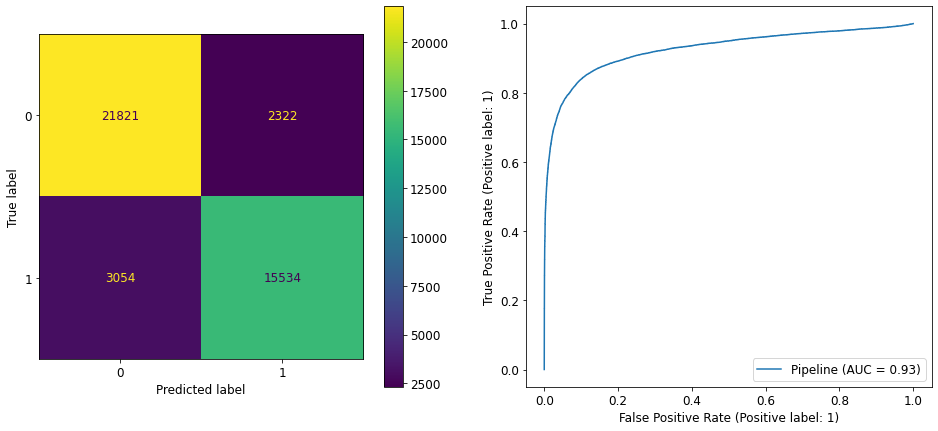

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model, accuracy, roc_auc = run_model(Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="elasticnet", l1_ratio=1, solver="saga"))]), X_train, X_test, y_train, y_test);

<span style="font-weight: bold;">The solver is able to converge and we're getting a better result compared to the cell above. But the score is roughly the same as the score of the model without regularization. Let's run a grid search to see if tweaking the l1 ratio can help up achieve better performance.</span>

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {"logistic__l1_ratio": np.arange(0,1.1,0.1)}

gcv = GridSearchCV(estimator=Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="elasticnet", solver="saga"))]), param_grid=parameters, n_jobs=4)
gcv.fit(X_train, y_train.values.ravel())
print(f"Best L1 regularization rario parameter: {gcv.best_params_}")

Best L1 regularization rario parameter: {'logistic__l1_ratio': 1.0}


<span style="font-weight: bold;">It turns out that our chosen parameter L1 ratio parameter is the best choice for the model. In other words, a full Lasso regression seems to perform better than a mix of, or only Ridge regression.</span>

#### Naive Bayes

Accuracy:0.8578783552924106, ROC AUC: 0.8531235941297726
              precision    recall  f1-score   support

           0    0.86300   0.88970   0.87614     24143
           1    0.85074   0.81655   0.83329     18588

    accuracy                        0.85788     42731
   macro avg    0.85687   0.85312   0.85472     42731
weighted avg    0.85766   0.85788   0.85750     42731



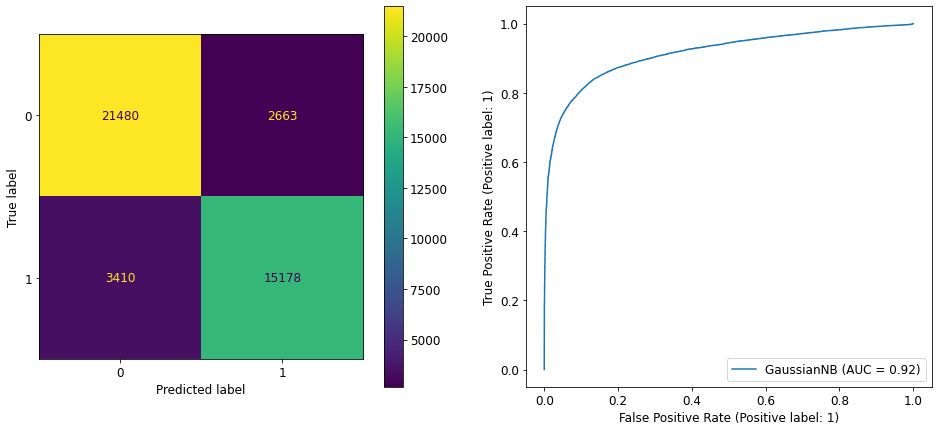

In [34]:
from sklearn.naive_bayes import GaussianNB

model, accuracy, roc_auc = run_model(GaussianNB(), X_train, X_test, y_train, y_test);

#### K-Neighbors

Accuracy:0.7496899206664951, ROC AUC: 0.7334048363170305
              precision    recall  f1-score   support

           0    0.74000   0.85868   0.79493     24143
           1    0.76814   0.60813   0.67884     18588

    accuracy                        0.74969     42731
   macro avg    0.75407   0.73340   0.73688     42731
weighted avg    0.75224   0.74969   0.74443     42731



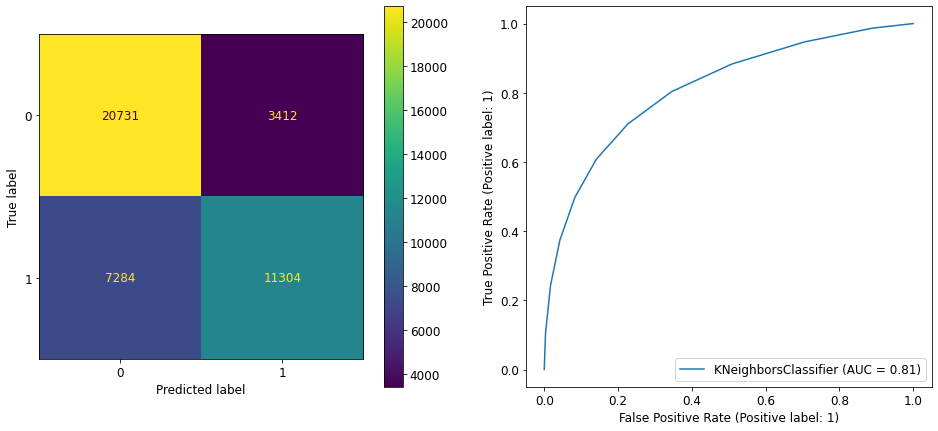

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model, accuracy, roc_auc = run_model(KNeighborsClassifier(n_neighbors=10, algorithm="kd_tree", n_jobs=4), X_train, X_test, y_train, y_test);

#### Decision Tree Classifer

Accuracy:0.8971940745594533, ROC AUC: 0.8979550695718835
              precision    recall  f1-score   support

           0    0.92335   0.89210   0.90746     24143
           1    0.86576   0.90381   0.88437     18588

    accuracy                        0.89719     42731
   macro avg    0.89455   0.89796   0.89591     42731
weighted avg    0.89830   0.89719   0.89741     42731



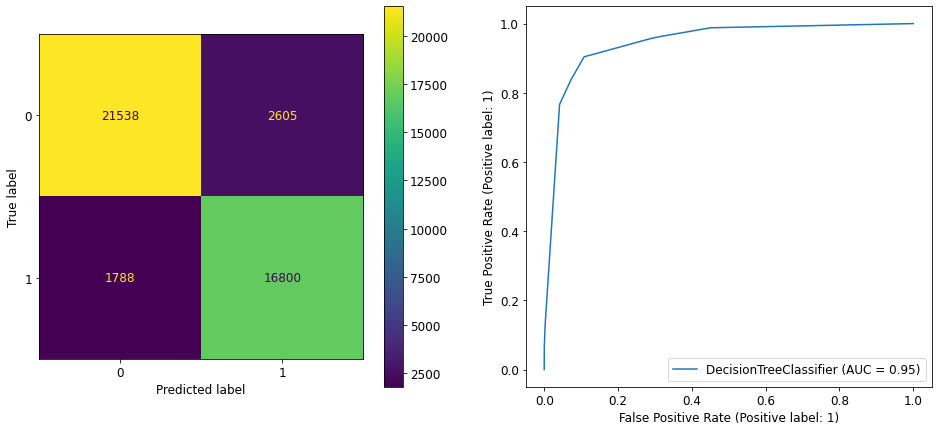

In [36]:
from sklearn.tree import DecisionTreeClassifier

model, accuracy, roc_auc = run_model(DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=10), X_train, X_test, y_train, y_test, True);

We can visualize the tree

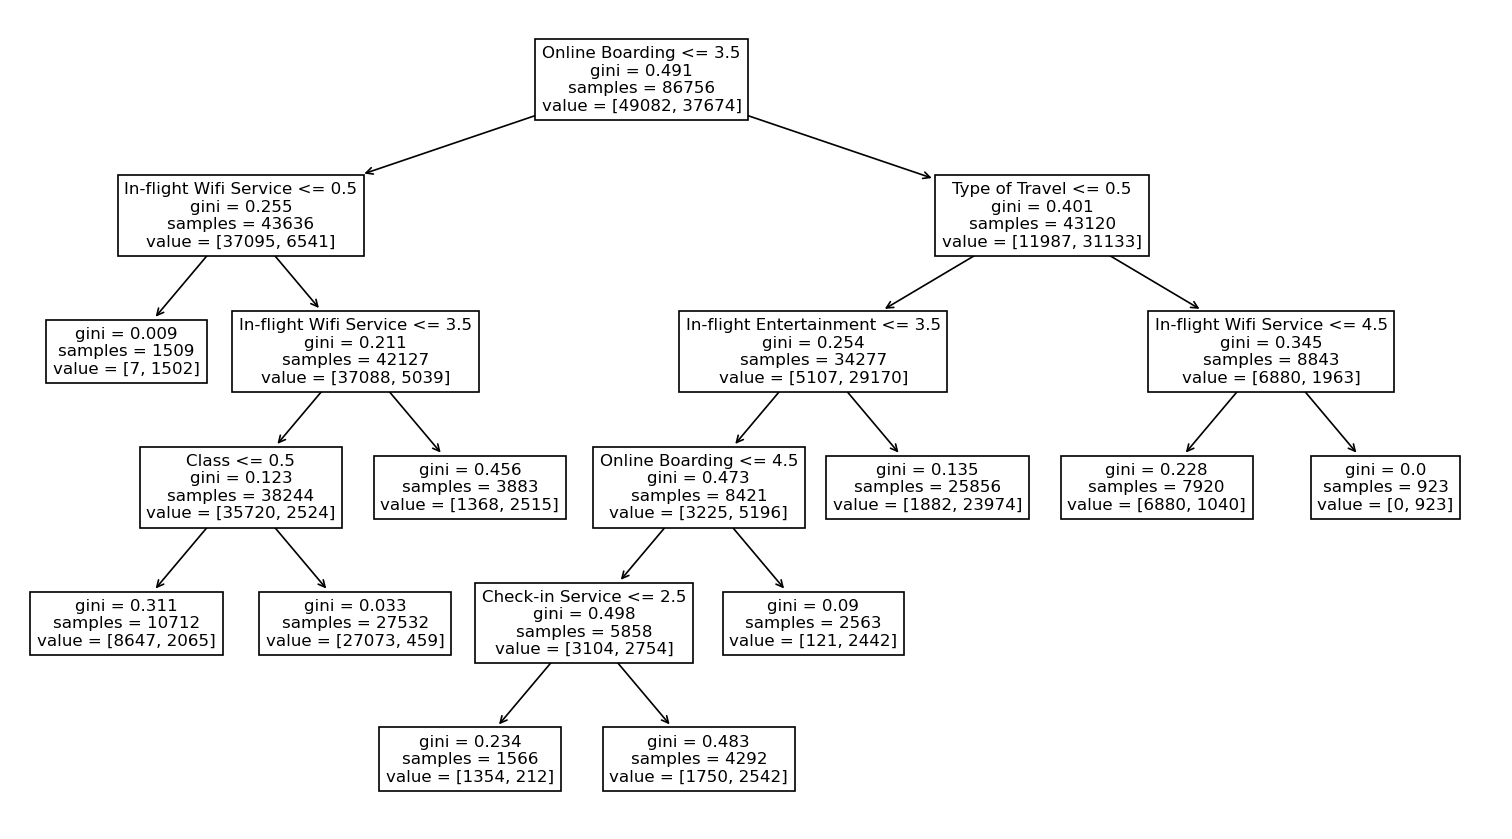

In [37]:
from sklearn import tree
plt.figure(figsize=(16,9), dpi=120)
tree.plot_tree(model, label='all', feature_names=feature_list, fontsize=10);

#### Neural Network

Accuracy:0.930144391659451, ROC AUC: 0.9266566641282622
              precision    recall  f1-score   support

           0    0.92517   0.95349   0.93911     24143
           1    0.93708   0.89983   0.91808     18588

    accuracy                        0.93014     42731
   macro avg    0.93113   0.92666   0.92860     42731
weighted avg    0.93035   0.93014   0.92996     42731



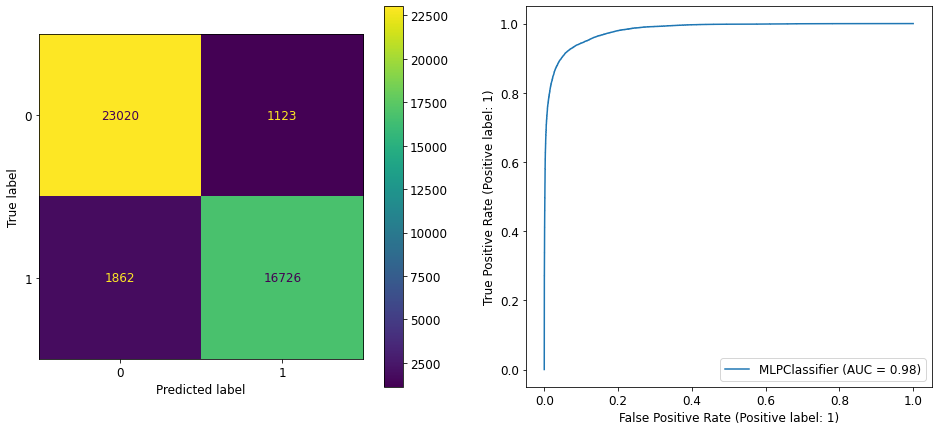

In [38]:
from sklearn.neural_network import MLPClassifier

model, accuracy, roc_auc = run_model(MLPClassifier(), X_train, X_test, y_train, y_test, True);

#### Random Forest

Accuracy:0.9636095574641361, ROC AUC: 0.9611674816987131
              precision    recall  f1-score   support

           0    0.95669   0.97995   0.96818     24143
           1    0.97311   0.94238   0.95750     18588

    accuracy                        0.96361     42731
   macro avg    0.96490   0.96117   0.96284     42731
weighted avg    0.96384   0.96361   0.96354     42731



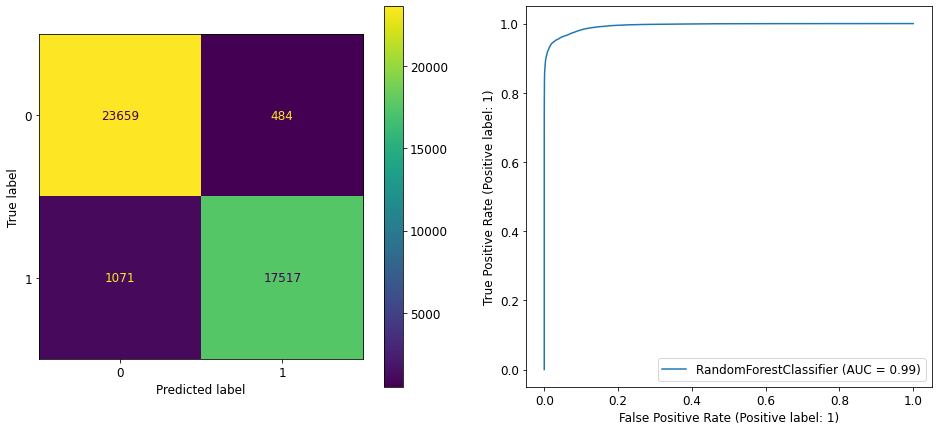

In [39]:
from sklearn.ensemble import RandomForestClassifier

model, accuracy, roc_auc = run_model(RandomForestClassifier(), X_train, X_test, y_train, y_test, True);

#### Adaptive Boosting

Accuracy:0.9285998455453885, ROC AUC: 0.9267442557512368
              precision    recall  f1-score   support

           0    0.93317   0.94102   0.93708     24143
           1    0.92255   0.91247   0.91748     18588

    accuracy                        0.92860     42731
   macro avg    0.92786   0.92674   0.92728     42731
weighted avg    0.92855   0.92860   0.92855     42731



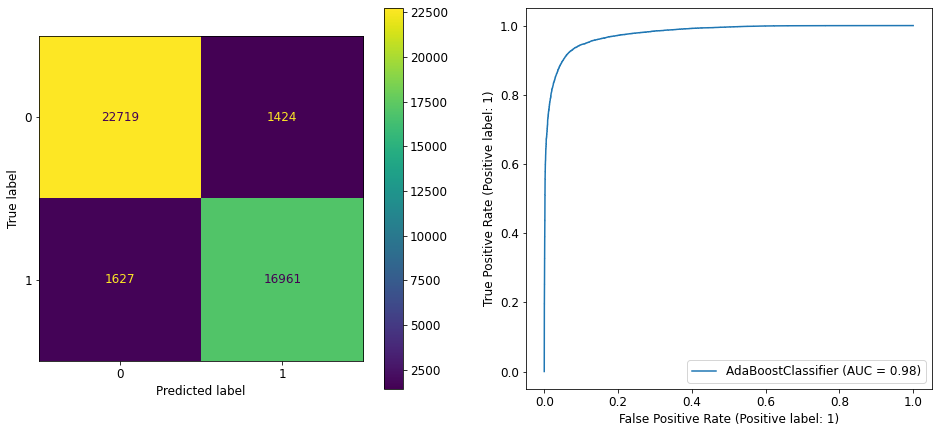

In [40]:
from sklearn.ensemble import AdaBoostClassifier

model, accuracy, roc_auc = run_model(AdaBoostClassifier(), X_train, X_test, y_train, y_test, True);

## V: Arrival

We have reached the end of our flight towards data exploration and modeling. 
We hope you had an enjoyable journey. Godspeed. 

## IV: Landing (Description of challenges/obstacles faced)

We have reached the end of our flight towards data exploration and modeling. 
We hope you had an enjoyable journey. Godspeed. 